In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
num_steps = 10
ground_truth_xs = np.linspace(0,10,num=num_steps+1)
ground_truth_ys = ground_truth_xs.copy()

ground_truth_states = np.stack((ground_truth_xs,ground_truth_ys),axis=1)

x_0,y_0 = 0,0
motion_states = [np.array([x_0,y_0])]

u_t = np.array([1.0,1.0])

A = np.array([[1,0],[0,1]])

B = np.array([[1,0],[0,1]])

Q = np.array([[0.3,0],[0,0.3]])

for i in range(num_steps):
    motion_noise = np.random.multivariate_normal(mean=np.array([0,0]),cov=Q)
    new_state = A @ motion_states[-1] + B@u_t+motion_noise
    motion_states.append(new_state)

measurement_states = [np.array([x_0,y_0])]
H = np.array([[1,0],[0,1]])

R = np.array([[0.75,0],[0,0.6]])

In [18]:
for i in range(num_steps):
    measurement_noise = np.random.multivariate_normal(mean=np.array([0,0]),cov=R)
    new_measurement = H @ ground_truth_states[i+1] + measurement_noise
    measurement_states.append(new_measurement)
    
motion_states = np.array(motion_states)
measurement_states = np.array(measurement_states)

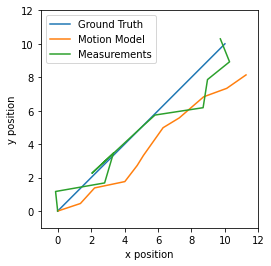

In [19]:
plt.plot(ground_truth_states[:,0],ground_truth_states[:,1])
plt.plot(motion_states[:,0],motion_states[:,1])
plt.plot(measurement_states[:,0],measurement_states[:,1])

plt.xlim(-1,12)
plt.ylim(-1,12)

plt.xlabel('x position')
plt.ylabel('y position')

plt.legend(['Ground Truth','Motion Model','Measurements'])
plt.gca().set_aspect('equal',adjustable='box')
plt.show()